In [51]:
from astropy.io import fits
from astropy import units, constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from voigt_fit_lib import *

Load in the files

In [52]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/'

First, the FUV files

In [53]:
spec_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new.fits')
nodes_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new_nodes.fits')
ids_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new_identifications.fits')
lsf_fits_fuv = fits.open(rootdir + 'FUV/PG1522_COS_FUV_wavcal2022_lsf_ZQ.fits')

Then, the NUV files

In [4]:
spec_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new.fits')
nodes_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new_nodes.fits')
ids_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new_identifications.fits')
lsf_fits_nuv = fits.open(rootdir + 'G185M/PG1522_COS_NUV_wavcal2022_lsf.fits')

Then, the STIS files

In [5]:
spec_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new.fits')
nodes_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new_nodes.fits')
ids_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new_identifications.fits')
lsf_fits_stis = fits.open(rootdir + 'STIS/PG1522_STIS_NUV_wavcal2022_lsf.fits')

Compile a list of the spectra, continuum nodes, and IDs for all detectors

In [6]:
spec_fits_list = [spec_fits_fuv, spec_fits_nuv, spec_fits_stis]
nodes_fits_list = [nodes_fits_fuv, nodes_fits_nuv, nodes_fits_stis]
ids_fits_list = [ids_fits_fuv, ids_fits_nuv, ids_fits_stis]
lsf_fits_list = [lsf_fits_fuv, lsf_fits_nuv, lsf_fits_stis]

Load in the ions table for atomic data

In [7]:
ions_table = np.loadtxt('/Users/thepoetoftwilight/Documents/CUBS/pabs0/data/linelists/atom.dat', dtype=str)

Get OIV554 in COS FUV

In [8]:
oiv_554_fuv = ion('OIV554', 121, 'FUV')

In [9]:
oiv_554_fuv.grab_ion_info(ids_fits_list, ions_table)

In [10]:
oiv_554_fuv.grab_ion_spec(spec_fits_list, v_range=[-200,200], v_abs_range=[-100,100], degree=1)

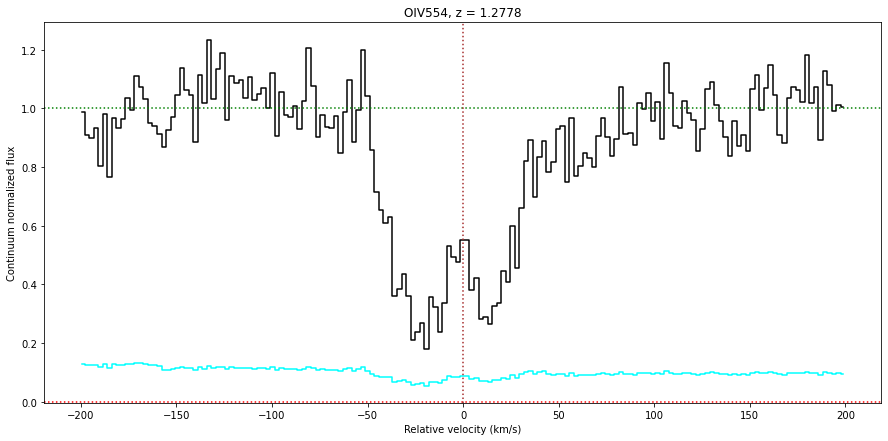

In [11]:
fig, ax = plt.subplots(1, figsize=(15,7))

oiv_554_fuv.plot_ion_spec(ax)

In [12]:
oiv_554_fuv.grab_ion_lsf(lsf_fits_list)

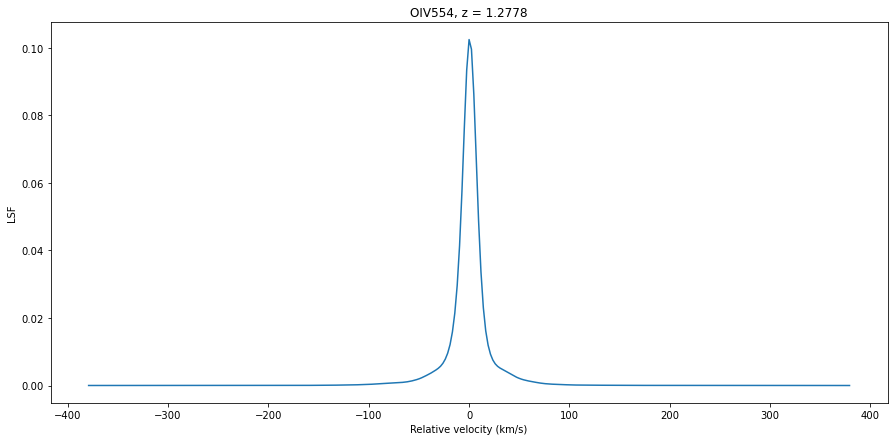

In [13]:
fig, ax = plt.subplots(1, figsize=(15, 7))

oiv_554_fuv.plot_ion_lsf(ax)

In [14]:
logN = 13
b1 = 10
b2 = 20
delta_v_c = 0
v = resample(oiv_554_fuv.v, N=1000, eps=0)
delta_v = np.mean(v[1:]-v[:-1])

In [15]:
mod1 = model_spec_gen_draft(v, logN, b1, delta_v_c, 
                      oiv_554_fuv.wav0_obs, oiv_554_fuv.f, oiv_554_fuv.gamma, 
                      False, oiv_554_fuv.lsf, oiv_554_fuv.v_lsf)

mod2 = model_spec_gen_draft(v, logN, b2, delta_v_c, 
                      oiv_554_fuv.wav0_obs, oiv_554_fuv.f, oiv_554_fuv.gamma, 
                      False, oiv_554_fuv.lsf, oiv_554_fuv.v_lsf)

mod1_conv = model_spec_gen_draft(v, logN, b1, delta_v_c, 
                      oiv_554_fuv.wav0_obs, oiv_554_fuv.f, oiv_554_fuv.gamma, 
                      True, oiv_554_fuv.lsf, oiv_554_fuv.v_lsf)

mod2_conv = model_spec_gen_draft(v, logN, b2, delta_v_c, 
                      oiv_554_fuv.wav0_obs, oiv_554_fuv.f, oiv_554_fuv.gamma, 
                      True, oiv_554_fuv.lsf, oiv_554_fuv.v_lsf)

In [16]:
np.sum(1-mod1)*delta_v, np.sum(1-mod2)*delta_v, np.sum(1-mod1_conv)*delta_v, np.sum(1-mod2_conv)*delta_v

(6.498595394182503, 6.972511220017557, 6.487536125003859, 6.960483449513576)

(0.0, 1.0)

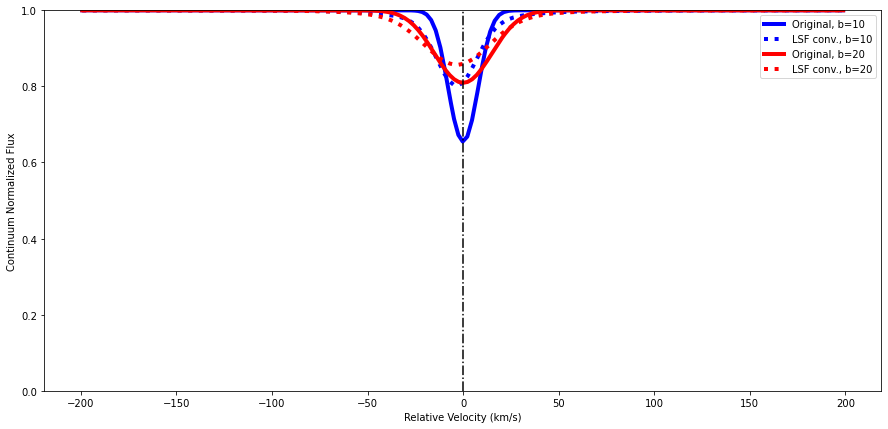

In [17]:
fig, ax = plt.subplots(1, figsize=(15, 7))

ax.plot(v, mod1, color='blue', label='Original, b={}'.format(b1), lw=4)
ax.plot(v, mod1_conv, color='blue', linestyle=':', label='LSF conv., b={}'.format(b1), lw=4)

ax.plot(v, mod2, color='red', label='Original, b={}'.format(b2), lw=4)
ax.plot(v, mod2_conv, color='red', linestyle=':', label='LSF conv., b={}'.format(b2), lw=4)

ax.axvline(delta_v_c, color='black', linestyle='-.')

ax.legend()

ax.set_xlabel('Relative Velocity (km/s)')
ax.set_ylabel('Continuum Normalized Flux')

ax.set_ylim(0,1)

In [18]:
oiv_554_fuv.init_multi_voigt(init_values = np.array([[14.2, 7, -20.5], 
                                                     [13.8, 7, 17]]), 
                             lsf_convolve = True)

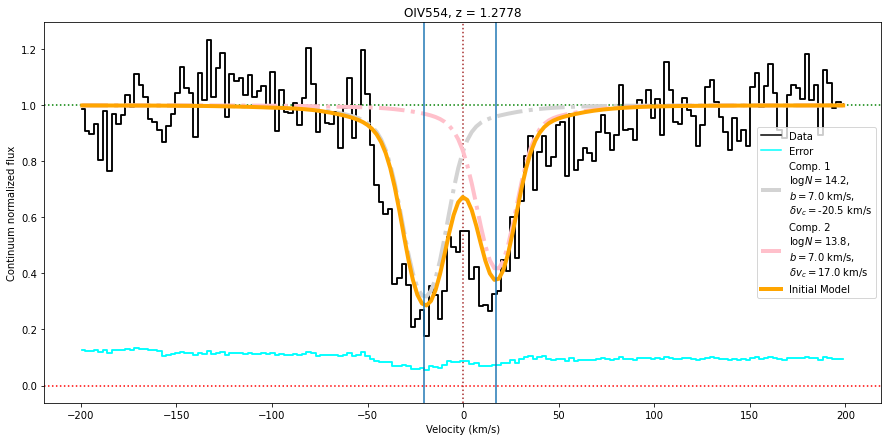

In [19]:
fig, ax = plt.subplots(1, figsize=(15, 7))

oiv_554_fuv.plot_init_profile(ax, legend=True)

ax.axvline(-20.5)
ax.axvline(17)

In [20]:
oiv_554_fuv.fit_multi_voigt()

/Users/thepoetoftwilight/opt/anaconda3/lib/python3.8/site-packages/lmfit/model.py:599: UserWarning: unknown parameter hint 'mi' for param 'c1_log_N'
  warnings.warn(self._invalid_hint % (key, name))
/Users/thepoetoftwilight/opt/anaconda3/lib/python3.8/site-packages/lmfit/model.py:599: UserWarning: unknown parameter hint 'mi' for param 'c2_log_N'
  warnings.warn(self._invalid_hint % (key, name))
/Users/thepoetoftwilight/opt/anaconda3/lib/python3.8/site-packages/lmfit/model.py:990: UserWarning: The keyword argument wav0_obs does not match any arguments of the model function. It will be ignored.
  warnings.warn(f"The keyword argument {name} does not " +
/Users/thepoetoftwilight/opt/anaconda3/lib/python3.8/site-packages/lmfit/model.py:990: UserWarning: The keyword argument f does not match any arguments of the model function. It will be ignored.
  warnings.warn(f"The keyword argument {name} does not " +
/Users/thepoetoftwilight/opt/anaconda3/lib/python3.8/site-packages/lmfit/model.py:990: 

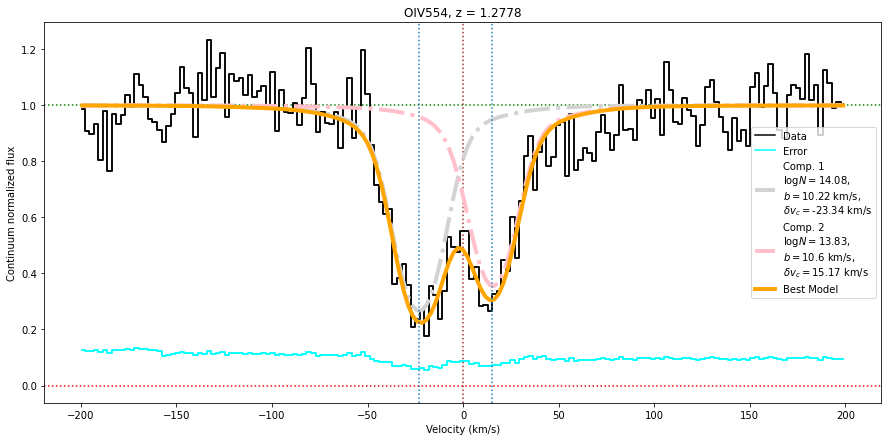

In [21]:
fig, ax = plt.subplots(1, figsize=(15, 7))

oiv_554_fuv.plot_best_profile(ax, legend=True)
ax.axvline(-23.34, linestyle=':')
ax.axvline(15.17, linestyle=':')

Get OIV608 in COS FUV

In [22]:
oiv_608_fuv = ion('OIV608', 121, 'FUV')

In [23]:
oiv_608_fuv.grab_ion_info(ids_fits_list, ions_table)

In [24]:
oiv_608_fuv.grab_ion_spec(spec_fits_list, v_range=[-150,150], v_abs_range=[-90,110], degree=1)

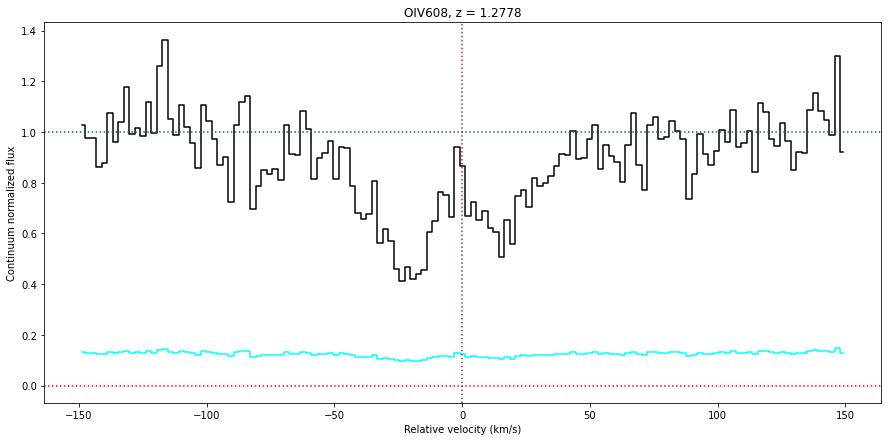

In [25]:
fig, ax = plt.subplots(1, figsize=(15,7))

oiv_608_fuv.plot_ion_spec(ax)

In [26]:
oiv_608_fuv.grab_ion_lsf(lsf_fits_list)

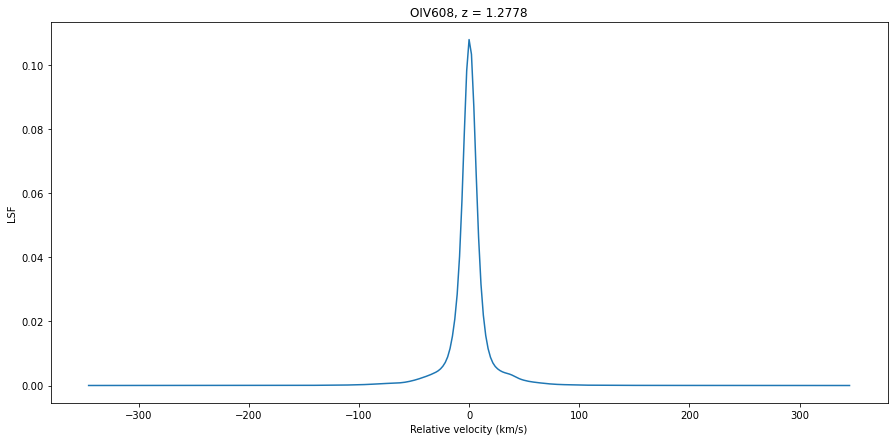

In [27]:
fig, ax = plt.subplots(1, figsize=(15, 7))

oiv_608_fuv.plot_ion_lsf(ax)

In [28]:
len(oiv_608_fuv.lsf)

321

In [29]:
oiv_608_fuv.init_multi_voigt(init_values = np.array([[14.2, 7, -20.5], 
                                                     [13.8, 7, 17]]), 
                             lsf_convolve = True)

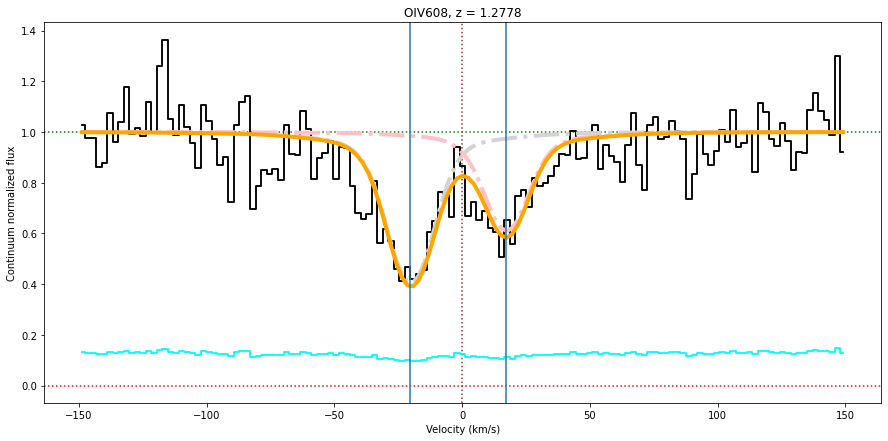

In [30]:
fig, ax = plt.subplots(1, figsize=(15, 7))

oiv_608_fuv.plot_init_profile(ax)

ax.axvline(-20.5)
ax.axvline(17)

In [31]:
oiv_608_fuv.fit_multi_voigt()

/Users/thepoetoftwilight/opt/anaconda3/lib/python3.8/site-packages/lmfit/model.py:599: UserWarning: unknown parameter hint 'mi' for param 'c1_log_N'
  warnings.warn(self._invalid_hint % (key, name))
/Users/thepoetoftwilight/opt/anaconda3/lib/python3.8/site-packages/lmfit/model.py:599: UserWarning: unknown parameter hint 'mi' for param 'c2_log_N'
  warnings.warn(self._invalid_hint % (key, name))
/Users/thepoetoftwilight/opt/anaconda3/lib/python3.8/site-packages/lmfit/model.py:990: UserWarning: The keyword argument wav0_obs does not match any arguments of the model function. It will be ignored.
  warnings.warn(f"The keyword argument {name} does not " +
/Users/thepoetoftwilight/opt/anaconda3/lib/python3.8/site-packages/lmfit/model.py:990: UserWarning: The keyword argument f does not match any arguments of the model function. It will be ignored.
  warnings.warn(f"The keyword argument {name} does not " +
/Users/thepoetoftwilight/opt/anaconda3/lib/python3.8/site-packages/lmfit/model.py:990: 

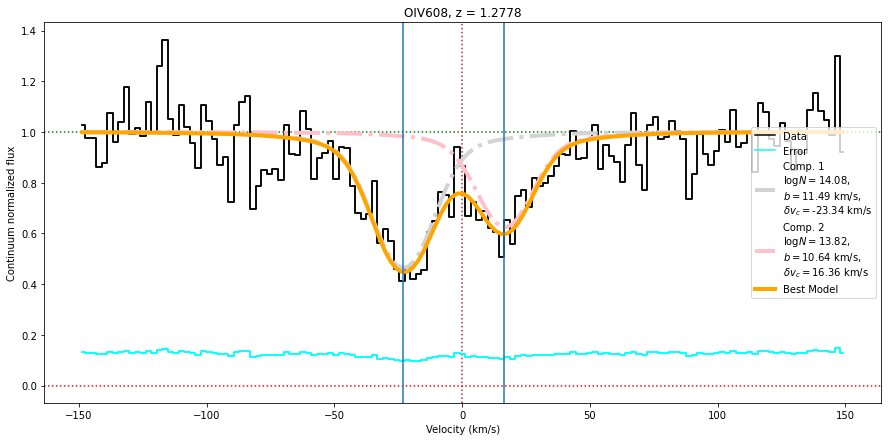

In [32]:
fig, ax = plt.subplots(1, figsize=(15, 7))

oiv_608_fuv.plot_best_profile(ax, legend=True)
ax.axvline(-23.34)
ax.axvline(16.36)

Get OVI1031 from STIS

In [33]:
ovi_1031_stis = ion('OVI1031', 32, 'STIS')

In [34]:
ovi_1031_stis.grab_ion_info(ids_fits_list, ions_table)

In [35]:
ovi_1031_stis.grab_ion_spec(spec_fits_list, v_range=[-200,200], v_abs_range=[-100,100], degree=1)

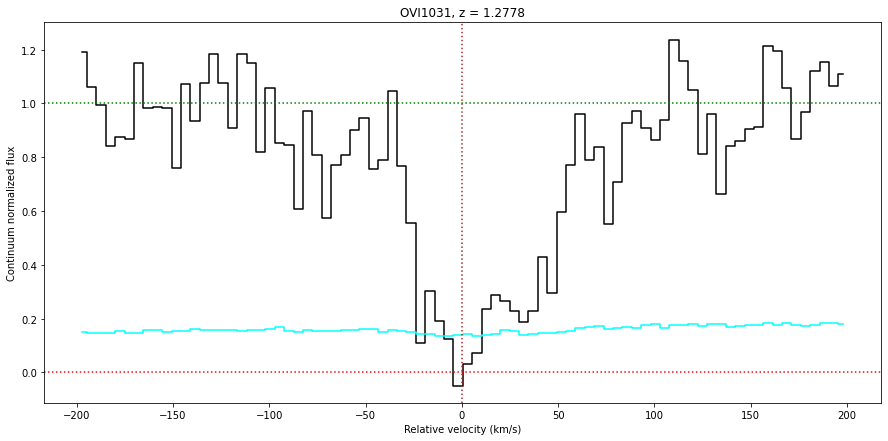

In [36]:
fig, ax = plt.subplots(1, figsize=(15,7))

ovi_1031_stis.plot_ion_spec(ax)

#ax.set_ylim(0,1.5)

In [37]:
np.mean(ovi_1031_stis.v[1:]-ovi_1031_stis.v[:-1])

4.878583621941233

In [38]:
ovi_1031_stis.grab_ion_lsf(lsf_fits_list)

In [39]:
len(ovi_1031_stis.lsf)

23

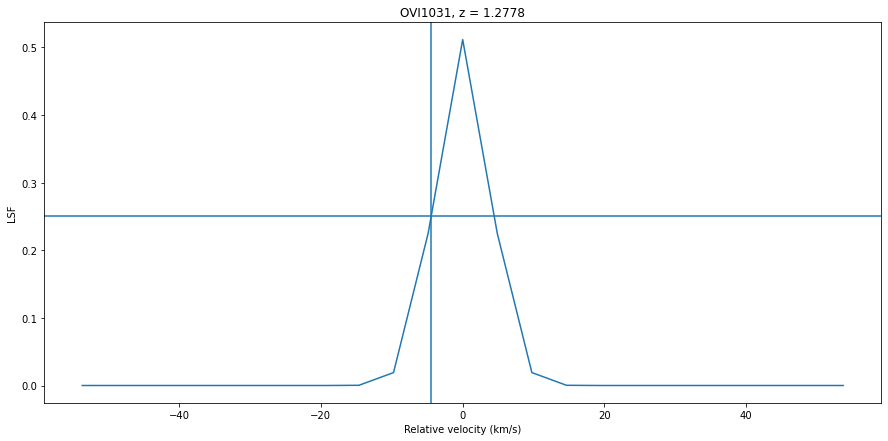

In [40]:
fig, ax = plt.subplots(1, figsize=(15, 7))

ovi_1031_stis.plot_ion_lsf(ax)

ax.axhline(0.25)
ax.axvline(-4.5)

In [45]:
# Single component guess, centroid fixed
#ovi_1031_stis.init_multi_voigt(init_values = np.array([[13.5, 70, 0]]), lsf_convolve = False)

# 2 component guess, centroid variable
ovi_1031_stis.init_multi_voigt(init_values = np.array([[14, 5, -7],
                                                      [14, 6, 9]]), lsf_convolve = True)

# 2 component guess, centroid fixed
#ovi_1031_stis.init_multi_voigt(init_values = np.array([[17.2, 1, 0],
#                                                      [13, 20,35]]), lsf_convolve = True)

# 3 component guess
#ovi_1031_stis.init_multi_voigt(init_values = np.array([[15, 4, -7],
#                                                      [17, 4, 10],
#                                                      [14, 2, 0]]), lsf_convolve = True)

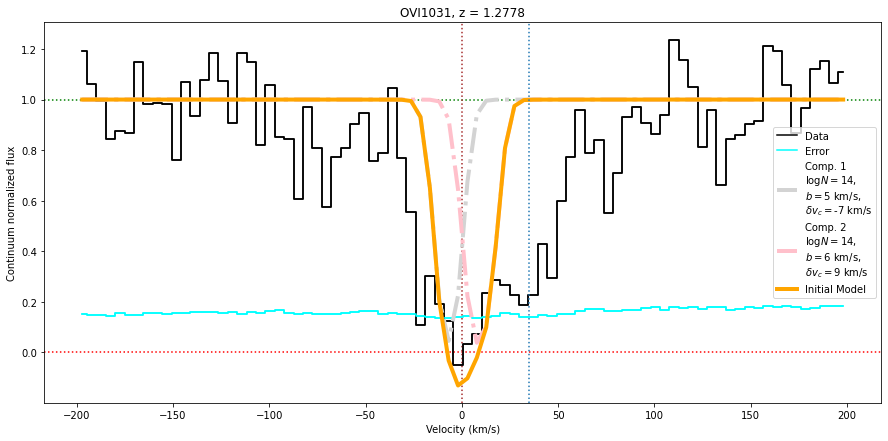

In [46]:
fig, ax = plt.subplots(1, figsize=(15, 7))


ovi_1031_stis.plot_init_profile(ax, legend=True)
ax.axvline(35, linestyle=':')

In [49]:
ovi_1031_stis.fit_multi_voigt()
#ovi_1031_stis.fit_multi_voigt(fix_indices = ((0,2), (1,2)),
#                              lower_bounds = {(0,1):0, (1,1):0},
#                              upper_bounds = {(0,1): 5, (1,1): 5})

/Users/thepoetoftwilight/opt/anaconda3/lib/python3.8/site-packages/lmfit/model.py:599: UserWarning: unknown parameter hint 'mi' for param 'c1_log_N'
  warnings.warn(self._invalid_hint % (key, name))
/Users/thepoetoftwilight/opt/anaconda3/lib/python3.8/site-packages/lmfit/model.py:599: UserWarning: unknown parameter hint 'mi' for param 'c2_log_N'
  warnings.warn(self._invalid_hint % (key, name))
/Users/thepoetoftwilight/opt/anaconda3/lib/python3.8/site-packages/lmfit/model.py:990: UserWarning: The keyword argument wav0_obs does not match any arguments of the model function. It will be ignored.
  warnings.warn(f"The keyword argument {name} does not " +
/Users/thepoetoftwilight/opt/anaconda3/lib/python3.8/site-packages/lmfit/model.py:990: UserWarning: The keyword argument f does not match any arguments of the model function. It will be ignored.
  warnings.warn(f"The keyword argument {name} does not " +
/Users/thepoetoftwilight/opt/anaconda3/lib/python3.8/site-packages/lmfit/model.py:990: 

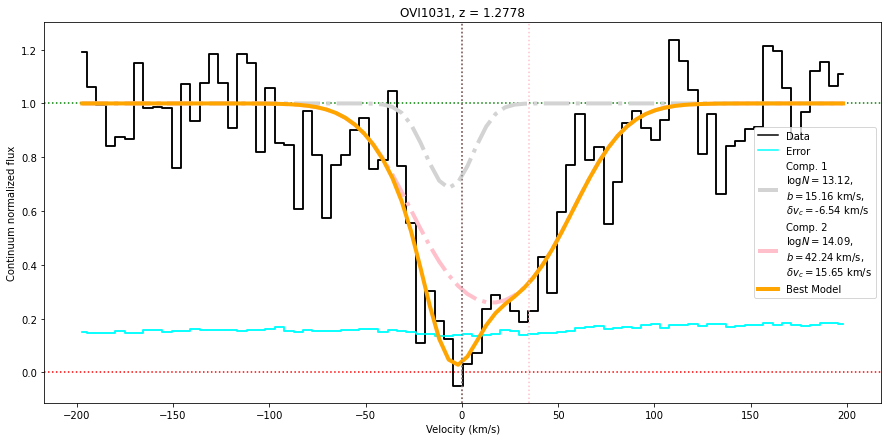

In [50]:
fig, ax = plt.subplots(1, figsize=(15, 7))

ovi_1031_stis.plot_best_profile(ax, legend=True)

ax.axvline(0, color='gray', linestyle=':')
ax.axvline(35, color='pink', linestyle=':')